#### Predicting the strength of concrete cubes at 28 days

In [95]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.pyplot import subplots

In [106]:
# Define function to predict strength of concrete cubes
def predict(strength, age, cement_type):
    """
    Function to predict the strength of concrete cubes expected at 28 days.

    params:
        - strength: Characteristic Strength (pre-calculated from the average value of the 3 sample cubes)
        - age: Age of the cubes
        - cement_type: R,N,S defined below;
        cement of strength classes CEM 42.5R, CEM 52.5N and CEM 52.5R (Class R)
        cement of strength classes CEM 32.5R, CEM 42.5N (Class N)
        cement of strength classes CEM 32.5N (Class S)

    returns:
        - Expected strength of the concrete cube samples at 28 days
    """
    # Coefficients and following calculations are based on BS EN 1992-1-1, sub-clause 3.1.2(6);
    #  0.20 for cement of strength classes CEM 42.5R, CEM 52.5N and CEM 52.5R (Class R)
    #  0.25 for cement of strength classes CEM 32.5R, CEM 42.5N (Class N)
    #  0.38 for cement of strength classes CEM 32.5N (Class S)
    s = [0.2, 0.25, 0.38]

    # Time array from 0 to 28 days
    t = np.linspace(1, 28, 28)

    # Strength proportion achieved in time t
    proportions = {}
    for coeff in s:
        proportion_strength_gained_per_day = list(
            np.exp(coeff * (1 - (np.sqrt(28 / t))))
        )
        proportions[coeff] = proportion_strength_gained_per_day

    # Create dataframes holding data for R, N and S classes
    R = {
        "Days": t,
        "Proportion of 28-day Strength": proportions[0.2],
    }
    N = {
        "Days": t,
        "Proportion of 28-day Strength": proportions[0.25],
    }
    S = {
        "Days": t,
        "Proportion of 28-day Strength": proportions[0.38],
    }

    R = pd.DataFrame(R)
    N = pd.DataFrame(N)
    S = pd.DataFrame(S)

    if cement_type == "R":
        selected_cement = R
    elif cement_type == "N":
        selected_cement = N
    elif cement_type == "S":
        selected_cement = S

    # Set plotting theme
    sns.set_theme(
        context="notebook",
        style="darkgrid",
        font="Trebuchet MS",
        palette="dark",
        font_scale=0.65,
        rc={"figure.figsize": (8, 4), "font.weight": 500, "figure.dpi": 900},
    )

    # Create an axes object and plot dataframe values
    ax = subplots()[1]
    lines = [
        {"CEM 42.5R, CEM 52.5N and CEM 52.5R (Class R)": R},
        {"CEM 32.5R, CEM 42.5N (Class N)": N},
        {"CEM 32.5N (Class S)": S},
    ]
    for line in lines:
        cement_list = list(line.keys())
        cement = cement_list[0]
        data_list = list(line.values())
        data = data_list[0]

        colors = ["gray", "orange", "maroon"]
        ax.plot(
            data["Days"],
            data["Proportion of 28-day Strength"],
            label=cement,
            c=colors[lines.index(line)],
        )

    # Add labels, legends, title, etc.
    ax.set_title("Proportion of 28-day Strength vs Age", weight=600)
    ax.set_ylabel("Proportion of 28-day Strength", weight=500)
    ax.set_xlabel("Age(in days)", weight=500)
    ax.set_xlim(0, 30)
    ax.legend()

    # Interpolate the 28 day strength proportion of a CEM for a given age if needed, and plot
    x = selected_cement["Days"]
    y = selected_cement["Proportion of 28-day Strength"]

    f = interp1d(x, y, kind="linear")
    predicted_proportion = f(age)

    ax.axvline(age, ls="--", c="k", lw=1.5)
    ax.axhline(predicted_proportion, ls="--", c="k", lw=1.5)

    # Calculate the expected concrete strength of the sample cubes at 28 days
    expected_strength = strength / predicted_proportion

    return ax, expected_strength

#### Concrete Strength Prediction

,Age,Mean Strength (Mpa),Characteristic Strength (Mpa),Expected Strength at 28 days (Mpa)
1,26,30.69,26.69,26.94


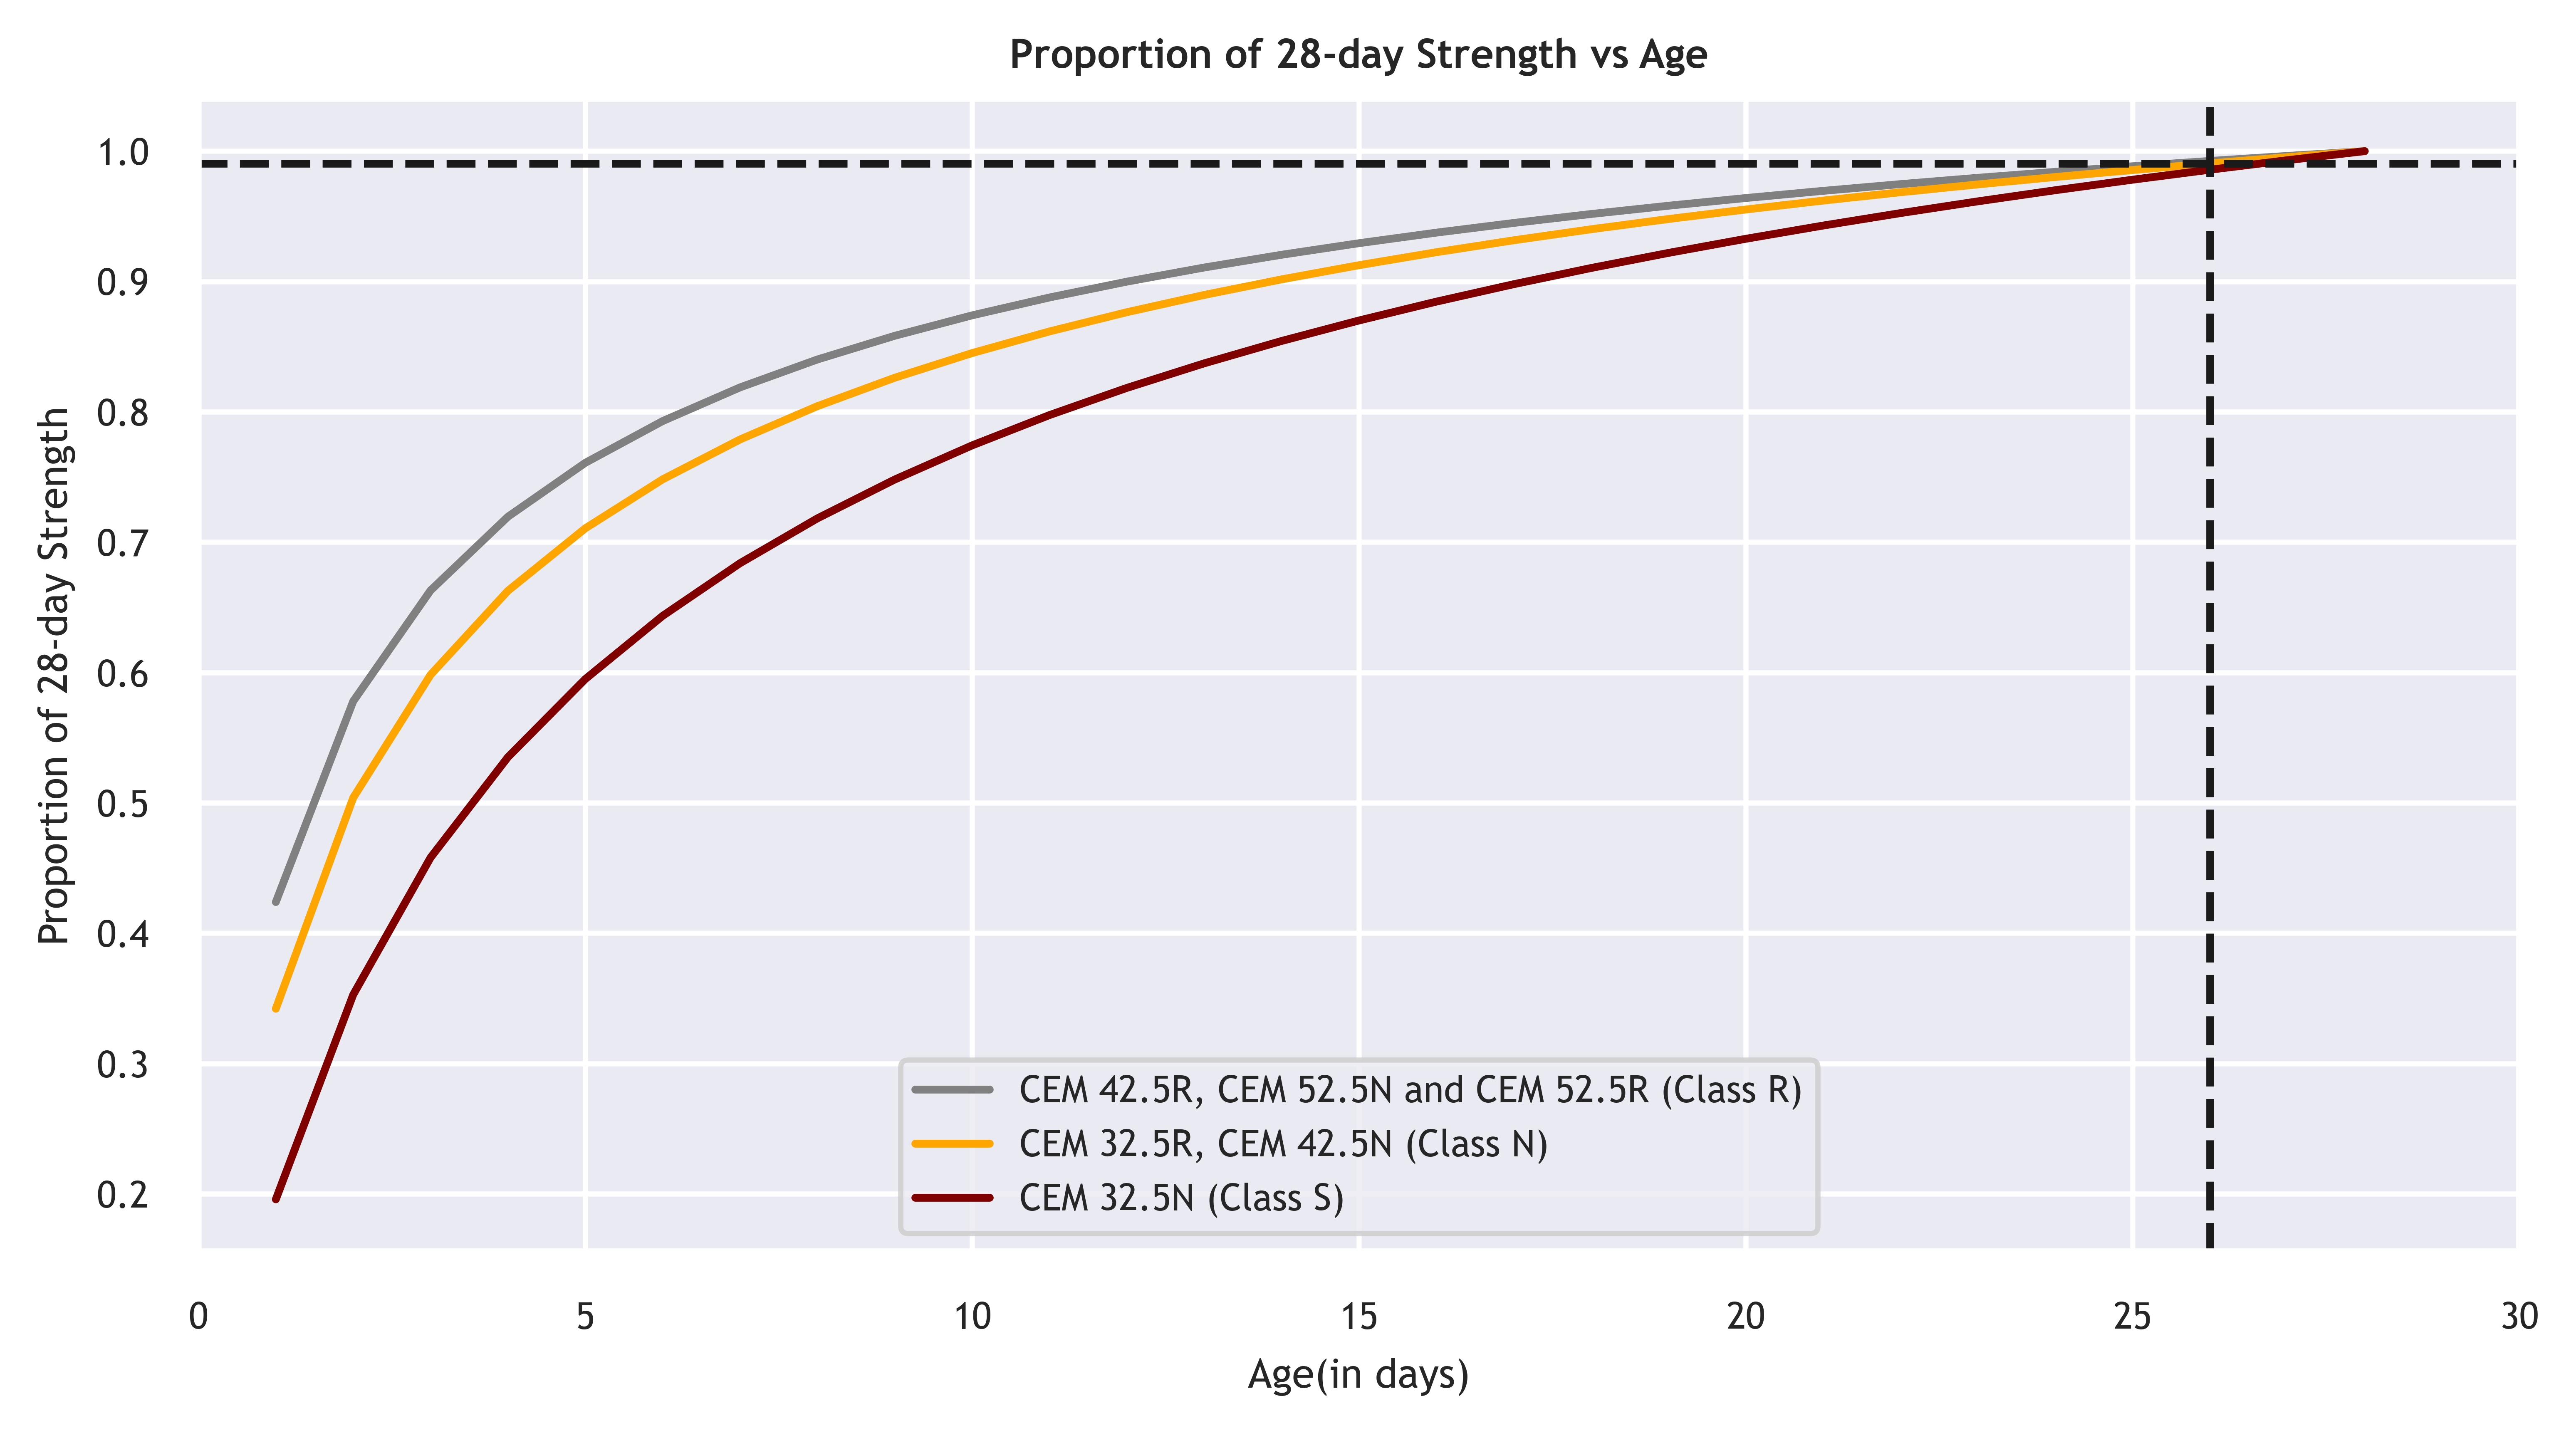

In [108]:
# Enter cube test results
results = [38.76, 27.89, 25.42]

mean = np.mean(results)
characteristic_strength = mean - 4
age = 26
cement_type = "N"

# Predict 28-day strength and print output
expected_strength = predict(characteristic_strength, age, cement_type)[1]
data = {
    "Age": age,
    "Mean Strength (Mpa)": round(mean, 2),
    "Characteristic Strength (Mpa)": round(characteristic_strength, 2),
    "Expected Strength at 28 days (Mpa)": round(expected_strength, 2),
}
table_of_results = pd.DataFrame(data, index=[1])

table_of_results